In [34]:
import os, sys
# repo root: one level up from this notebook
sys.path.insert(0, os.path.abspath(".."))

from engression_local import engression, Engressor, preanm_simulator
# sanity check
import engression_local as pkg
print("Loaded from:", pkg.__file__)

Loaded from: /Users/seyonghw/Desktop/simulation/engression-python/engression_local/__init__.py


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Simulate data


In [19]:
x, y = preanm_simulator("square", n=10000, x_lower=0, x_upper=2, noise_std=1, train=True, device=device)
x_eval, y_eval_med, y_eval_mean = preanm_simulator("square", n=1000, x_lower=0, x_upper=4, noise_std=1, train=False, device=device)

## Engression

original energy distance with phi="power", beta=0.5

In [20]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5385,  E(|Y-Yhat|): 0.9274,  E(|Yhat-Yhat'|): 0.7778
[Epoch 100 (20%), batch 9] energy-loss: 0.4051,  E(|Y-Yhat|): 0.8449,  E(|Yhat-Yhat'|): 0.8794
[Epoch 200 (40%), batch 9] energy-loss: 0.4163,  E(|Y-Yhat|): 0.8173,  E(|Yhat-Yhat'|): 0.8019
[Epoch 300 (60%), batch 9] energy-loss: 0.4149,  E(|Y-Yhat|): 0.8203,  E(|Yhat-Yhat'|): 0.8108
[Epoch 400 (80%), batch 9] energy-loss: 0.4217,  E(|Y-Yhat|): 0.8321,  E(|Yhat-Yhat'|): 0.8208
[Epoch 500 (100%), batch 9] energy-loss: 0.4175,  E(|Y-Yhat|): 0.8212,  E(|Yhat-Yhat'|): 0.8075

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.9061,  E(|Y-Yhat|): 3.6541,  E(|Yhat-Yhat'|): 3.4959

Predictio

In [21]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 1.91, 
	E(|Y-Yhat|): 3.65, 
	E(|Yhat-Yhat'|): 3.50


In [22]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))

L2 loss: 0.06505198031663895
correlation between predicted and true means: 0.995582103729248


In [23]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

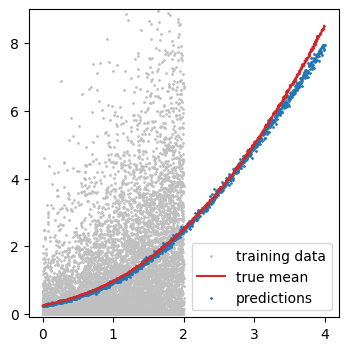

In [24]:
plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()

original energy distance with phi="power", beta=1 (not a negative-type semimetric)

In [25]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.9253,  E(|Y-Yhat|): 1.1901,  E(|Yhat-Yhat'|): 0.5295
[Epoch 100 (20%), batch 9] energy-loss: 1.0688,  E(|Y-Yhat|): 191.8150,  E(|Yhat-Yhat'|): 381.4924
[Epoch 200 (40%), batch 9] energy-loss: 0.6118,  E(|Y-Yhat|): 23.6052,  E(|Yhat-Yhat'|): 45.9867
[Epoch 300 (60%), batch 9] energy-loss: 0.5624,  E(|Y-Yhat|): 17.8663,  E(|Yhat-Yhat'|): 34.6077
[Epoch 400 (80%), batch 9] energy-loss: 0.5814,  E(|Y-Yhat|): 20.2527,  E(|Yhat-Yhat'|): 39.3427
[Epoch 500 (100%), batch 9] energy-loss: 0.6532,  E(|Y-Yhat|): 47.1332,  E(|Yhat-Yhat'|): 92.9601

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.3502,  E(|Y-Yhat|): 108.1097,  E(|Yhat-Yhat'|): 211

In [26]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 2.35, 
	E(|Y-Yhat|): 108.11, 
	E(|Yhat-Yhat'|): 211.52


In [27]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))

L2 loss: 2.0670673847198486
correlation between predicted and true means: 0.8492927551269531


In [28]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

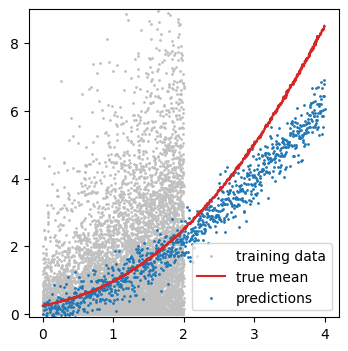

In [29]:
plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()

original energy distance with phi="exp"

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.1657,  E(|Y-Yhat|): 0.3031,  E(|Yhat-Yhat'|): 0.2749
[Epoch 100 (20%), batch 9] energy-loss: 0.1394,  E(|Y-Yhat|): 0.2836,  E(|Yhat-Yhat'|): 0.2883
[Epoch 200 (40%), batch 9] energy-loss: 0.1407,  E(|Y-Yhat|): 0.2792,  E(|Yhat-Yhat'|): 0.2770
[Epoch 300 (60%), batch 9] energy-loss: 0.1423,  E(|Y-Yhat|): 0.2833,  E(|Yhat-Yhat'|): 0.2819
[Epoch 400 (80%), batch 9] energy-loss: 0.1363,  E(|Y-Yhat|): 0.2753,  E(|Yhat-Yhat'|): 0.2781
[Epoch 500 (100%), batch 9] energy-loss: 0.1411,  E(|Y-Yhat|): 0.2805,  E(|Yhat-Yhat'|): 0.2788

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1947,  E(|Y-Yhat|): 0.3892,  E(|Yhat-Yhat'|): 0.3889

Predictio

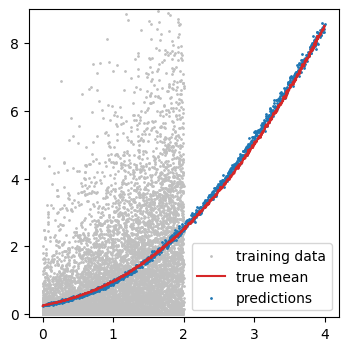

In [30]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=500, batch_size=1000, device=device)

# Summarize model information
engressor.summary()

# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))

# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()

original energy distance with phi="log1p"

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.3561,  E(|Y-Yhat|): 0.5881,  E(|Yhat-Yhat'|): 0.4639
[Epoch 100 (20%), batch 9] energy-loss: 0.2846,  E(|Y-Yhat|): 0.5546,  E(|Yhat-Yhat'|): 0.5399
[Epoch 200 (40%), batch 9] energy-loss: 0.2721,  E(|Y-Yhat|): 0.5615,  E(|Yhat-Yhat'|): 0.5788
[Epoch 300 (60%), batch 9] energy-loss: 0.2770,  E(|Y-Yhat|): 0.5578,  E(|Yhat-Yhat'|): 0.5617
[Epoch 400 (80%), batch 9] energy-loss: 0.2803,  E(|Y-Yhat|): 0.5578,  E(|Yhat-Yhat'|): 0.5549
[Epoch 500 (100%), batch 9] energy-loss: 0.2880,  E(|Y-Yhat|): 0.5641,  E(|Yhat-Yhat'|): 0.5521

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.4359,  E(|Y-Yhat|): 0.8494,  E(|Yhat-Yhat'|): 0.8269

Predictio

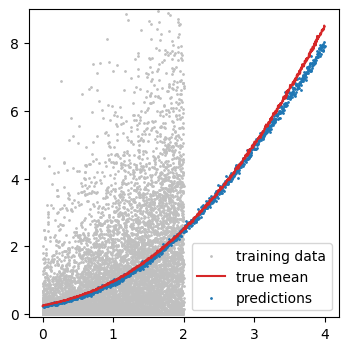

In [31]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=500, batch_size=1000, device=device)

# Summarize model information
engressor.summary()

# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))

# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()

original energy distance with phi="frac"

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.1816,  E(|Y-Yhat|): 0.3246,  E(|Yhat-Yhat'|): 0.2860
[Epoch 100 (20%), batch 9] energy-loss: 0.1543,  E(|Y-Yhat|): 0.3108,  E(|Yhat-Yhat'|): 0.3129
[Epoch 200 (40%), batch 9] energy-loss: 0.1550,  E(|Y-Yhat|): 0.3105,  E(|Yhat-Yhat'|): 0.3110
[Epoch 300 (60%), batch 9] energy-loss: 0.1544,  E(|Y-Yhat|): 0.3127,  E(|Yhat-Yhat'|): 0.3166
[Epoch 400 (80%), batch 9] energy-loss: 0.1547,  E(|Y-Yhat|): 0.3097,  E(|Yhat-Yhat'|): 0.3099
[Epoch 500 (100%), batch 9] energy-loss: 0.1539,  E(|Y-Yhat|): 0.3070,  E(|Yhat-Yhat'|): 0.3063

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.2048,  E(|Y-Yhat|): 0.4064,  E(|Yhat-Yhat'|): 0.4031

Predictio

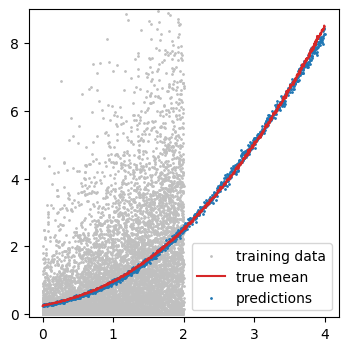

In [32]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=500, batch_size=1000, device=device)

# Summarize model information
engressor.summary()

# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))

# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()

## Baseline: $L_2$ regression

In [10]:
from engression.models import Net

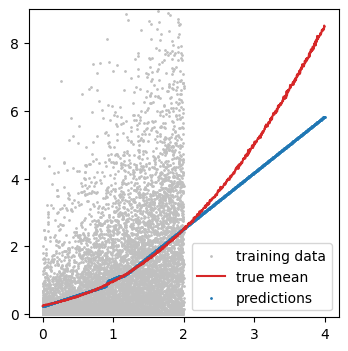

In [11]:
# Build a model with the same architecture
model = Net(num_layer=2, hidden_dim=100) # NN with the same architecture
opt = torch.optim.Adam(model.parameters(), lr=0.005) # same optimizer

# L2 regression training
model.train()
for i in range(500):
    model.zero_grad()
    y_pred = model(x)
    loss = (y_pred - y).pow(2).mean()
    loss.backward()
    opt.step()

# Evaluation
model.eval()
y_pred = model(x_eval).detach()
plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 9)
plt.legend(); plt.show()